In [1]:
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt 
from sklearn import metrics


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

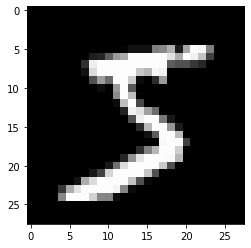

In [3]:
plt.imshow(x_train[0], cmap='gray') 

In [4]:
plt.show() 

In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
print("X_train shape", x_train.shape) 
print("y_train shape", y_train.shape) 
print("X_test shape", x_test.shape) 
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [7]:
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') 

In [8]:
x_test = x_test.astype('float32')
x_train /= 255 # Each image has Intensity from 0 to 255 
x_test /= 255


In [9]:
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test] 

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) 

In [11]:
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu')) #returns a sequence of another vectors of dimension 512 model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax')) 

In [12]:
model.compile(loss='categorical_crossentropy', # for a multi-class classification problem 
        optimizer=RMSprop(),
        metrics=['accuracy']) 

In [13]:
batch_size = 128 # batch_size argument is passed to the layer to define a batch size for the inputs. 
epochs = 20
history = model.fit(x_train, y_train,
        batch_size=batch_size, 
        epochs=epochs,
        verbose=1, 
        validation_data=(x_test, y_test)) 


Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 0.2484 - accuracy: 0.9232 - val_loss: 0.1089 - val_accuracy: 0.9673
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0997 - accuracy: 0.9696 - val_loss: 0.1027 - val_accuracy: 0.9663
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0698 - accuracy: 0.9779 - val_loss: 0.0729 - val_accuracy: 0.9778
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0531 - accuracy: 0.9833 - val_loss: 0.0669 - val_accuracy: 0.9801
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0451 - accuracy: 0.9858 - val_loss: 0.0864 - val_accuracy: 0.9754
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.0642 - val_accuracy: 0.9821
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0684 - val_accuracy: 0.9812
Epoc

In [14]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 


Test loss: 0.08412650227546692
Test accuracy: 0.9847000241279602
